In [49]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [50]:
#fitting a KNN model with the MNIST dataset only performing scaling
X, y = datasets.load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.7, stratify=y, random_state=420)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

neigh = 3

knn = KNeighborsClassifier(n_neighbors=neigh)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.9531001589825119

In [51]:
#Fitting the same KNN model on PCA reduced data

pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=neigh)
knn_pca.fit(X_train_scaled_pca, y_train)
knn_pca.score(X_test_scaled_pca, y_test)

0.5421303656597775

<AxesSubplot: >

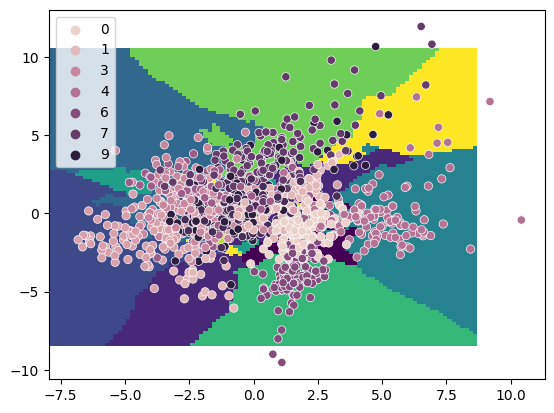

In [52]:
#Visualizing Neighbor Space
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 15

#create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    knn_pca, X_train_scaled_pca,
    #cmap = cmap_light,
    ax = ax,
    response_method = "predict", plot_method="pcolormesh", shading = 'auto'
)

sns.scatterplot(
    x = X_test_scaled_pca[:,0],
    y = X_test_scaled_pca[:,1],
 #   palette = cmap_bold,
    hue = y_test
)

In [63]:
#ES2
#Define a train-test split and further divide the train set into k=5 folds
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

pca = PCA(n_components=0.90)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)


params = {
    'n_neighbors': np.arange(1,5),
    'weights': ['uniform', 'distance'],
    'p' : np.arange(1,4)
}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, params, cv=5)
clf.fit(X_train_scaled_pca, y_train)




GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4]),
                         'p': array([1, 2, 3]),
                         'weights': ['uniform', 'distance']})

In [62]:
clf.cv_results_.keys()
clf.best_params_, clf.best_score_

knn_best = clf.best_estimator_

In [73]:
#stessa cosa ma con il pipeline operator in modo da includere il numero di componenti della pca come iperparametro da ottimizzare nella grid search

#MOLTO BELLO PIPELINE NB!!!!!


from sklearn.pipeline import Pipeline
pca = PCA()
knn = KNeighborsClassifier()
scaler = StandardScaler()
pipeline = Pipeline(steps = [
    ('scaler', scaler),
    ('pca', pca),
    ('knn', knn)
])

params = {
    'pca__n_components': [2,5,10,30,50],
    'knn__n_neighbors': np.arange(1,5),
    'knn__weights': ['uniform', 'distance'],
    'knn__p' : np.arange(1,4)
}

clf = GridSearchCV(pipeline, params, cv=5)
clf.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([1, 2, 3, 4]),
                         'knn__p': array([1, 2, 3]),
                         'knn__weights': ['uniform', 'distance'],
                         'pca__n_components': [2, 5, 10, 30, 50]})

In [75]:
clf.best_params_, clf.best_score_
#best_pipeline = clf.best_estimator_

({'knn__n_neighbors': 4,
  'knn__p': 2,
  'knn__weights': 'distance',
  'pca__n_components': 50},
 0.9482606004333025)

In [ ]:
#Es3 ripeto es2 senza usare cross validation

clf_nocv = GridSearchCV(pipeline, params, cv=5)